In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('hotel_bookings.csv')

In [3]:
dataset.shape

(119390, 32)

In [4]:
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Tasks

### 1. Doing Exploratory Data Analysis (EDA) on given dataset
 Exploratory data analysis will help business to get insight on data.
 We will also find important featured from dataset
 In EDA we will try to answer following questions
 - From which part of the world our most customer come?
 - Which month of the year is important for business 
 - How much people are ready to pay for one night?
 - What are important features in predicting cancelation?


### 2. Predicting cancelation
 We will try predict when customer will cancel booking based on the variables found in EDA

 

# Data Cleaning

In [5]:
dataset.isna().sum() 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
null_data_to_replace = {'children': 0,
                        'country' : 'Unknown',
                        'agent' : 0,
                        'company':0
                       }
dataset = dataset.fillna(null_data_to_replace)
dataset.isna().sum() 

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Exploratory Data Analysis (EDA)

## From which part of the world our most customer come?

In [7]:
number_of_guests_by_country = dataset['country'].value_counts()

In [8]:
percent_booking_by_country = dataset['country'].value_counts() / dataset.shape[0] * 100

In [9]:
country_name = number_of_guests_by_country.index

In [10]:
country_data = pd.DataFrame(percent_booking_by_country)

In [11]:
country_data['Number of guests'] = number_of_guests_by_country

In [12]:
country_data.head(10)

,country,Number of guests
PRT,40.698551,48590
GBR,10.159142,12129
FRA,8.723511,10415
ESP,7.176480,8568
DEU,6.103526,7287
ITA,3.154368,3766
IRL,2.826870,3375
BEL,1.961638,2342
BRA,1.862803,2224
NLD,1.762292,2104


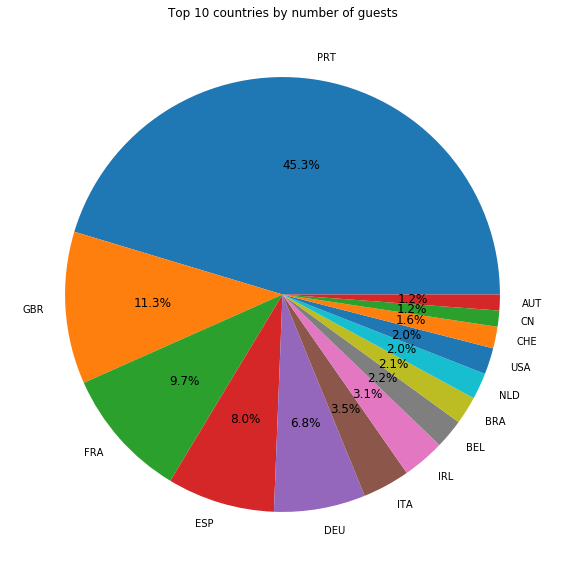

In [13]:
plt.figure(figsize=(10,10))
wedges, texts, autotexts = plt.pie(number_of_guests_by_country[percent_booking_by_country > 1], labels=country_name[percent_booking_by_country > 1], autopct='%1.1f%%')
plt.setp(autotexts, size=12)
plt.title("Top 10 countries by number of guests")
plt.show()

We can clearly see that most of out customer are from Portugal, Great Briton, France, Spain and other countries on Europe

## Which month of the year is important for business?

In [14]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Text(0, 0.5, 'Number of Guests')

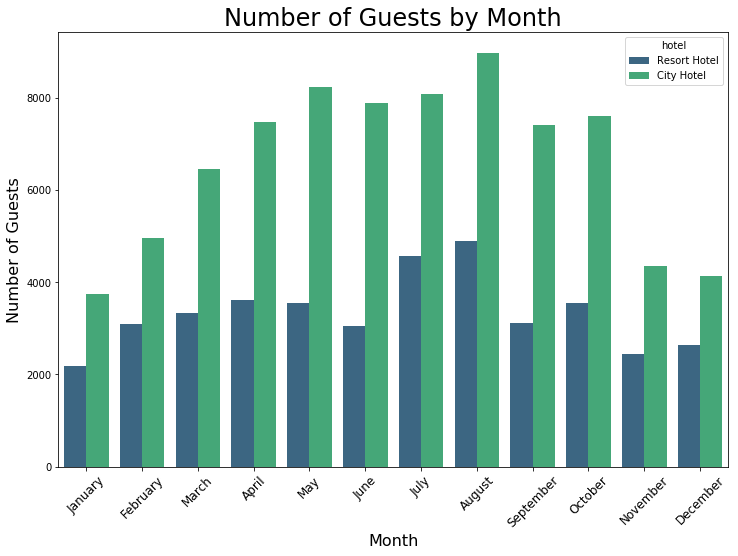

In [15]:
plt.figure(figsize=(12,8))
ordered_month = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
sns.countplot(data = dataset, x= 'arrival_date_month', palette='viridis', order=ordered_month, hue='hotel')
plt.title('Number of Guests by Month', fontsize=24)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Month', fontsize=16)

plt.ylabel('Number of Guests', fontsize=16)

We can see that for resorts July and August are most important month, while for city hotels April through October are important months

## How long people stay at hotel?

In [16]:
dataset['Total_stay_in_days'] = dataset['stays_in_weekend_nights'] +dataset['stays_in_week_nights']

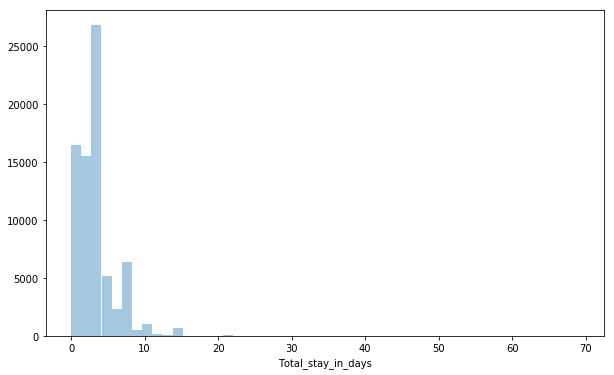

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['Total_stay_in_days'][dataset['is_canceled'] == 0], kde=False )

Text(0.5, 1.0, 'Stay in number of Days')

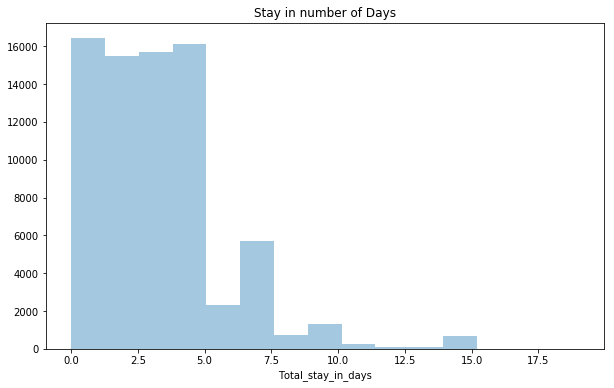

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['Total_stay_in_days'][dataset['is_canceled'] == 0][dataset['Total_stay_in_days'] < 20],kde=False, bins=15 )
plt.title('Stay in number of Days')

We can clearly see that most people stayed in hotel for 0-5 days

Let's find out if there is any difference in stay duration of city hotel and resorts

Text(0.5, 1.0, 'Stay in number of Days(Resort Hotel)')

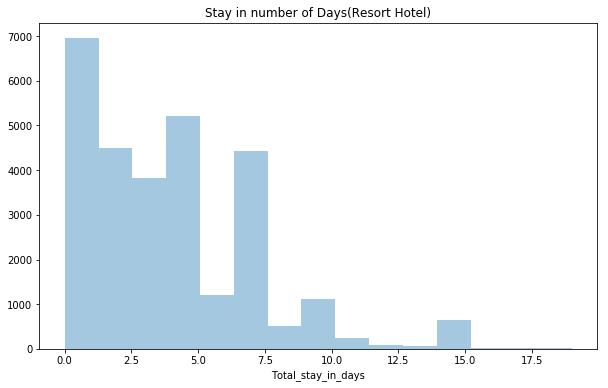

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['Total_stay_in_days'][dataset['is_canceled'] == 0][dataset['Total_stay_in_days'] < 20][dataset['hotel']=='Resort Hotel'],kde=False, bins=15 )
plt.title('Stay in number of Days(Resort Hotel)')

Text(0.5, 1.0, 'Stay in number of Days(City Hotel)')

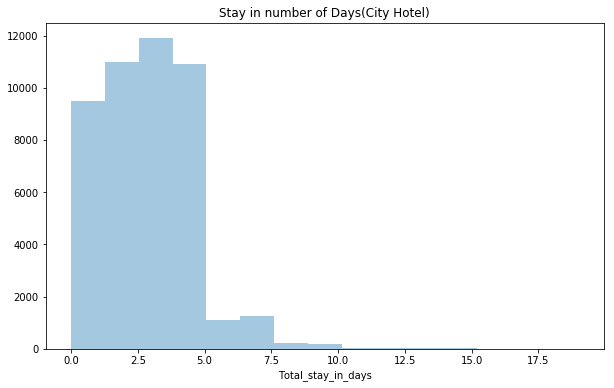

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['Total_stay_in_days'][dataset['is_canceled'] == 0][dataset['Total_stay_in_days'] < 20][dataset['hotel']=='City Hotel'],kde=False, bins=15 )
plt.title('Stay in number of Days(City Hotel)')

In [21]:
dataset[['hotel','Total_stay_in_days']][dataset['is_canceled'] == 0].groupby(by='hotel').mean()

,Total_stay_in_days
hotel,
City Hotel,2.923618
Resort Hotel,4.142892


#### Conclusion: People stay in resorts longer than city hotel for longer duration (for obvious reason)

## Is there any relation between lead time and cancelation?

In [23]:
lead_time_data = dataset[['lead_time', 'is_canceled']].groupby(by='lead_time').count()
lead_time_data.rename({'is_canceled': 'number_of_bookings'}, inplace=True, axis=1)
lead_time_data['canceled_bookings'] = dataset[['lead_time', 'is_canceled']].groupby(by='lead_time').sum()
lead_time_data['percent_cancelation'] = lead_time_data['canceled_bookings']/lead_time_data['number_of_bookings']

In [24]:
lead_time_data['percent_cancelation'] = lead_time_data['canceled_bookings']/lead_time_data['number_of_bookings']
lead_time_data = lead_time_data.reset_index()

In [25]:
lead_time_data.tail(10)

,lead_time,number_of_bookings,canceled_bookings,percent_cancelation
469,594,17,17,1.0
470,601,17,17,1.0
471,605,30,30,1.0
472,608,17,17,1.0
473,615,17,17,1.0
474,622,17,17,1.0
475,626,30,30,1.0
476,629,17,17,1.0
477,709,1,0,0.0
478,737,1,0,0.0


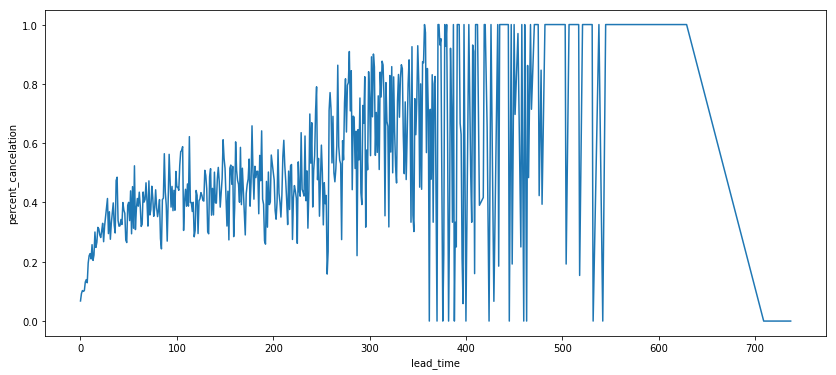

In [26]:
plt.figure(figsize=(14,6))
sns.lineplot(data=lead_time_data, x= 'lead_time', y='percent_cancelation')

We can conclude that as lead time increase, cancelation percent also increases